In [1]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

import requests 
import json
import csv
import time
from time import sleep
import pandas as pd
import re
from bs4 import BeautifulSoup

# 設定 User-Agent

headers = {
    'cookie': 'over18=1', 
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

# 發送 GET 請求取得文章內容
url = "https://www.ptt.cc/bbs/KoreaStar/search?q=jisoo"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

if response.status_code == 200:
    print(f'請求成功：{response.status_code}')
else:
    print(f'請求失敗：{response.status_code}')
    
url = "https://www.ptt.cc/bbs/KoreanPop/search?q=jisoo"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

if response.status_code == 200:
    print(f'請求成功：{response.status_code}')
else:
    print(f'請求失敗：{response.status_code}')

請求成功：200
請求成功：200


In [2]:
# 爬取PTT韓星版的文章連結
url1 = "https://www.ptt.cc/bbs/KoreaStar/search?q=jisoo"
headers = {"cookie": "over18=1;"} # 需要帶上cookie才能繞過18禁檢查
r1 = requests.get(url1, headers=headers)
soup1 = BeautifulSoup(r1.text, "html.parser")
articles1 = soup1.find_all("div", class_="r-ent")
kstar_links = []
for article in articles1:
    try:
        link = "https://www.ptt.cc" + article.find("a")["href"]
        kstar_links.append(link)
    except:
        continue

# 爬取PTT韓國綜藝版的文章連結
url2 = "https://www.ptt.cc/bbs/KoreanPop/search?q=jisoo"
r2 = requests.get(url2, headers=headers)
soup2 = BeautifulSoup(r2.text, "html.parser")
articles2 = soup2.find_all("div", class_="r-ent")
kpop_links = []
for article in articles2:
    try:
        link = "https://www.ptt.cc" + article.find("a")["href"]
        kpop_links.append(link)
    except:
        continue

# 將兩個版的文章連結寫入不同的csv檔
with open("JISOO.csv", mode="w", encoding="utf-8", newline="") as f1:
    writer1 = csv.writer(f1)
    for link in kstar_links:
        writer1.writerow([link])

with open('JISOO.csv', 'a', newline='', encoding='utf-8') as f2:
    writer2 = csv.writer(f2)
    for link in kpop_links:
        writer2.writerow([link])

In [3]:
df = pd.read_csv('JISOO.csv', header=None)

# 建立 comments.csv
with open('comments.csv', 'w', encoding='utf-8-sig') as f:
    f.write('id,comment\n')  # 寫入標題列
    k=1
    for i in range(len(df)):
        url = df.iloc[i, 0]  # 選取第 i 列的第 0 欄
        #print(f'正在處理第 {i+1} 篇文章...')
        res = requests.get(url, headers=headers)
        soup = BeautifulSoup(res.text, 'html.parser')

        # 取得留言內容
        comments = soup.select('.push-content')
        for j, comment in enumerate(comments):
            # 將留言內容存入 comments.csv
            f.write(f'{k},{comment.text.strip()}\n')
            k+=1

In [4]:
# 測試結巴功能
documents = ["LS大發，走花路吧"]
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lily\AppData\Local\Temp\jieba.cache
Loading model cost 1.004 seconds.
Prefix dict has been built successfully.


LS/大發/，/走花路/吧


In [5]:
data = pd.read_csv("comments.csv", usecols=[0, 1], names=["id", "comment"], header=0)
data.head(10)

,id,comment
0,1,: 太美了><
1,2,: 屋哩Jisoo不管什麼表情都是最漂亮♡
2,3,: 燦笑但是不會歪臉的人才能當偶像
3,4,: 她大笑時候看起來超療癒
4,5,: 任何時候都很漂亮的Jisoo
5,6,: 韓國人喜歡大牙齒 台灣人審美偏好小牙齒
6,7,: 每次看到jisoo都會讓人心情很好啊<3
7,8,: 美到要死了♥
8,9,: 看了心情很好～
9,10,: 超美…


In [6]:
segments = []
for comment in data['comment']:
    seg_list = jieba.lcut(comment)
    segments.append(seg_list)

# 把 list 轉成 DataFrame
df_segments = pd.DataFrame({'seg': segments})

# 顯示斷詞結果
print(df_segments.head(10))

                                                 seg
0                                [:,  , 太美, 了, >, <]
1      [:,  , 屋哩, Jisoo, 不管, 什麼, 表情, 都, 是, 最, 漂亮, ♡]
2            [:,  , 燦笑, 但是, 不會, 歪, 臉, 的, 人才, 能當, 偶像]
3                    [:,  , 她, 大笑, 時候, 看, 起來, 超療, 癒]
4                   [:,  , 任何, 時候, 都, 很漂亮, 的, Jisoo]
5        [:,  , 韓國人, 喜歡, 大牙, 齒,  , 台灣人, 審美, 偏好, 小牙齒]
6  [:,  , 每次, 看到, jisoo, 都, 會, 讓, 人, 心情, 很, 好, 啊,...
7                               [:,  , 美到, 要死, 了, ♥]
8                          [:,  , 看, 了, 心情, 很, 好, ～]
9                                      [:,  , 超美, …]


In [7]:
#合成list
LIST = df_segments['seg'].to_list()
#print(LIST)

In [8]:
#將kist內部的元素拆分
List = []
for key in range(len(LIST)):
    for value in LIST[key]:
        List.append(value)
#print(List)

In [9]:
results = pd.value_counts(List)
results.head(20)

         4245
:        3104
的         832
，         554
是         373
了         360
好         350
很         344
真的        293
聽         287
她         224
有         218
！         211
也         207
就         199
都         194
!         183
XD        180
不         165
Jisoo     163
dtype: int64

In [11]:
# 設定停用詞
stop_words = open('stop_words.txt', 'r', encoding='utf-8').read()

# 斷詞
seg_list = jieba.lcut(' '.join(results.index), cut_all=False)

# 篩選停用詞
seg_list = [word for word in List if word not in stop_words]
#seg_list

In [16]:
results2 = pd.value_counts(seg_list)
results2.head(10)

:        3104
真的        293
聽         287
!         183
XD        180
Jisoo     163
~         130
歌         125
…         124
/         124
dtype: int64

In [13]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

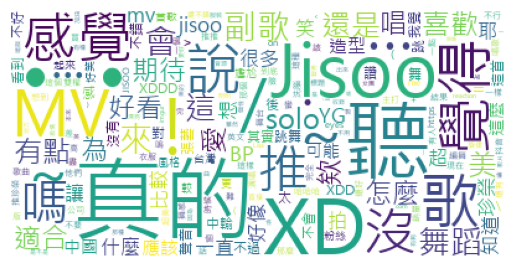

<Figure size 2500x1500 with 0 Axes>

In [14]:
wc = WordCloud(font_path= "C:\Windows\Fonts\msjh.ttc", 
               background_color="white", 
               max_words=200)

wc.generate_from_frequencies(results2)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(50,30), dpi =50)
plt.show()